<a href="https://colab.research.google.com/github/Reyhan-Code/Clasification-Cat-Dog-With-CNN/blob/main/Image_Classification_With_CNN_%26_Transfer_Learning_Cat%26Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os

# Download Dataset

In [2]:
!gdown 1oU7nFsLirpuEiVIjL4IJs7hsqzE4i9TD

Downloading...
From (original): https://drive.google.com/uc?id=1oU7nFsLirpuEiVIjL4IJs7hsqzE4i9TD
From (redirected): https://drive.google.com/uc?id=1oU7nFsLirpuEiVIjL4IJs7hsqzE4i9TD&confirm=t&uuid=094cef0d-ab8f-43e3-9d68-e61bce80e24b
To: /content/archive.zip
100% 228M/228M [00:06<00:00, 33.6MB/s]


In [3]:
! unzip "/content/archive.zip"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg 

In [4]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

In [5]:
os.listdir(train_dir)

['cats', 'dogs']

In [6]:
os.listdir(test_dir)

['cats', 'dogs']

# Augmentasi gambar

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [17]:

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=400,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=400,
        class_mode='categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Membangun Model

In [18]:
#Definisi arsitektur model Convolutional Neural Network (CNN) menggunakan TensorFlow dan Keras

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10)

Epoch 1/10
21/21 [==============================] - 112s 5s/step - loss: 0.6778 - accuracy: 0.5886 - val_loss: 0.6609 - val_accuracy: 0.6200
Epoch 2/10
21/21 [==============================] - 108s 5s/step - loss: 0.6314 - accuracy: 0.6527 - val_loss: 0.5953 - val_accuracy: 0.6950
Epoch 3/10
21/21 [==============================] - 109s 5s/step - loss: 0.5938 - accuracy: 0.6763 - val_loss: 0.6151 - val_accuracy: 0.6615
Epoch 4/10
21/21 [==============================] - 109s 5s/step - loss: 0.6074 - accuracy: 0.6778 - val_loss: 0.6117 - val_accuracy: 0.6610
Epoch 5/10
21/21 [==============================] - 112s 5s/step - loss: 0.5843 - accuracy: 0.6976 - val_loss: 0.5732 - val_accuracy: 0.7085
Epoch 6/10
21/21 [==============================] - 107s 5s/step - loss: 0.5658 - accuracy: 0.7047 - val_loss: 0.5444 - val_accuracy: 0.7225
Epoch 7/10
21/21 [==============================] - 113s 5s/step - loss: 0.5316 - accuracy: 0.7388 - val_loss: 0.5606 - val_accuracy: 0.7205
Epoch 8/10
21

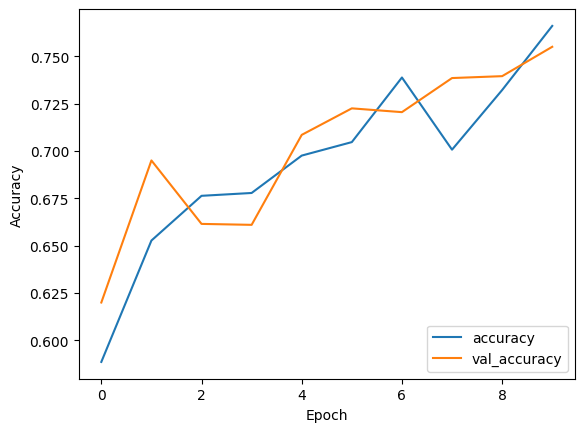

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Transfer Learning

In [37]:
from keras.applications import Xception

In [38]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

83683744/83683744 [==============================] - 5s 0us/step


In [39]:
for layer in base_model.layers:
    layer.trainable = False

In [40]:
model = tf.keras.models.Sequential([
    base_model,

    layers.Flatten(),

    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2,activation='softmax'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46552362 (177.58 MB)
Trainable params: 25690882 (98.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [41]:
optimizer = optimizers.Adam()

In [42]:
model.compile(optimizer=optimizer,
             loss="binary_crossentropy",
              metrics=['accuracy']
             )

In [43]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
21/21 [==============================] - 147s 6s/step - loss: 1.6515 - accuracy: 0.9549 - val_loss: 0.5039 - val_accuracy: 0.9852
Epoch 2/5
21/21 [==============================] - 125s 6s/step - loss: 0.6279 - accuracy: 0.9799 - val_loss: 0.2739 - val_accuracy: 0.9857
Epoch 3/5
21/21 [==============================] - 126s 6s/step - loss: 0.2246 - accuracy: 0.9833 - val_loss: 0.1471 - val_accuracy: 0.9891
Epoch 4/5
21/21 [==============================] - 123s 6s/step - loss: 0.0956 - accuracy: 0.9840 - val_loss: 0.0510 - val_accuracy: 0.9871
Epoch 5/5
21/21 [==============================] - 123s 6s/step - loss: 0.0413 - accuracy: 0.9856 - val_loss: 0.0486 - val_accuracy: 0.9891


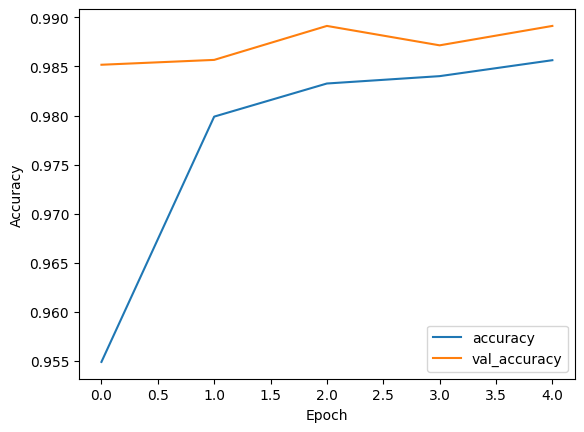

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [45]:
loss, accuracy = model.evaluate( validation_generator)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

6/6 [==============================] - 9s 1s/step - loss: 0.0486 - accuracy: 0.9891
Loss: 0.0486
Accuracy: 98.91%


In [46]:
model.save("CatDogsV2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Ubah ukuran gambar menjadi 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi gambar
    return img_array

def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)

    # Ambil prediksi pertama
    prediction_value = prediction[0][0]

    if prediction_value > 0.5:
        print(f"The image at {img_path} is predicted to be a cat with probability {prediction_value:.2f}")
    else:
        print(f"The image at {img_path} is predicted to be a dog with probability {1 - prediction_value:.2f}")

# Path ke model Keras
model_path = '/content/CatDogsV2.h5'

# Periksa apakah file model ada
if os.path.exists(model_path):
    # Muat model Keras
    model = load_model(model_path)

    # Contoh penggunaan
    test_image_path = '/content/kucing.jpeg'
    predict_image(model, test_image_path)
else:
    print(f"File tidak ditemukan: {model_path}")

1/1 [==============================] - 1s 1s/step
The image at /content/kucing.jpeg is predicted to be a cat with probability 1.00


1/1 [==============================] - 1s 759ms/step


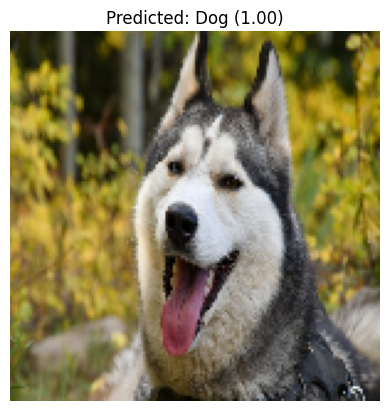

In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Ubah ukuran gambar menjadi 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi gambar
    return img_array

def visualize_prediction(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    img = image.load_img(img_path, target_size=(150, 150))

    plt.imshow(img)
    plt.axis('off')

    # Ambil nilai prediksi pertama
    prediction_value = prediction[0][0]

    if prediction_value > 0.5:
        plt.title(f"Predicted: Cat ({prediction_value:.2f})")
    else:
        plt.title(f"Predicted: Dog ({1 - prediction_value:.2f})")
    plt.show()

# Path ke model Keras
model_path = '/content/CatDogsV2.h5'

# Periksa apakah file model ada
if os.path.exists(model_path):
    # Muat model Keras
    model = load_model(model_path)

    # Contoh penggunaan
    test_image_path = '/content/anjing.jpg'
    visualize_prediction(model, test_image_path)
else:
    print(f"File tidak ditemukan: {model_path}")